FINM 36702 Portfolio Credit Risk Homework 3

Hannah Wang

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.stats import norm
from scipy import optimize
import warnings
warnings.filterwarnings('ignore')

# Question 1

## Suppose that the default rate of a portfolio has the triangular distribution: 𝑝𝑑𝑓_𝑑𝑟[𝑑𝑟]= 2−2𝑑𝑟. Suppose that in this portfolio 𝑙𝑔𝑑 is a function of 𝑑𝑟: 𝑙𝑔𝑑[𝑑𝑟]=𝑑𝑟^1/2. Derive and state the function 𝑝𝑑𝑓_𝑙𝑔𝑑[𝑙𝑔𝑑]. Create a single diagram containing plots of (𝑝𝑑𝑓_𝑑𝑟[𝑑𝑟] and 𝑝𝑑𝑓_𝑙𝑔𝑑[𝑙𝑔𝑑]) for variables in the range between 0 and 1. 

$d(dr)=2*d(lgd)$

$pdf_{lgd}[lgd] = (2−2*lgd^2) * 2 * lgd = 4*lgd - 4*lgd^3$

In [6]:
dr = np.linspace(0, 1, 100)
lgd = dr ** 0.5
pdf_dr = 2 - 2*dr
pdf_lgd = 4*lgd - 4*(lgd ** 3)

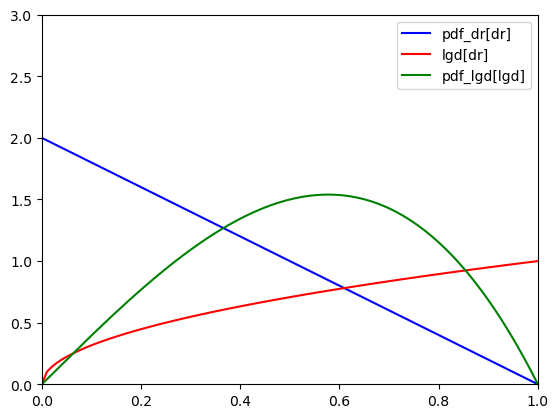

In [7]:
plt.plot(dr, pdf_dr,'b', label='pdf_dr[dr]')
plt.plot(dr, lgd, 'r', label='lgd[dr]')
plt.plot(lgd, pdf_lgd, 'g', label='pdf_lgd[lgd]')
plt.legend()
plt.ylim((0,3))
plt.xlim((0,1))
plt.show()

# Question 2

## Making the same assumptions as in Question 1, derive and state 𝑝𝑑𝑓_𝑙𝑜𝑠𝑠[𝑙𝑜𝑠𝑠]. Create a diagram containing the two plots from Question 1 along with the plot of 𝑝𝑑𝑓_𝑙𝑜𝑠𝑠[𝑙𝑜𝑠𝑠] for variables in the range between 0 and 1; limit the vertical axis to the range from zero to 3. State the values of  • Expected loss, EL • Expected LGD, ELGD • “Time-weighted” LGD 

$loss = dr*lgd = dr*dr^{1/2} = dr^{3/2}$

$dr = loss^{2/3}$

$d(dr) = {2/3}*d(loss)^{-1/3}$

$PDF_{LOSS}[loss] = (2-2*loss^{2/3})*(2/3*loss^{-1/3})
=\frac{4}{3}*loss^{-1/3} - \frac{4}{3}*loss^{1/3}$

In [8]:
loss = pow(dr, 3/2)
pdf_loss = (4/3) * np.power(loss,(-1/3)) - (4/3) * np.power(loss,(1/3))

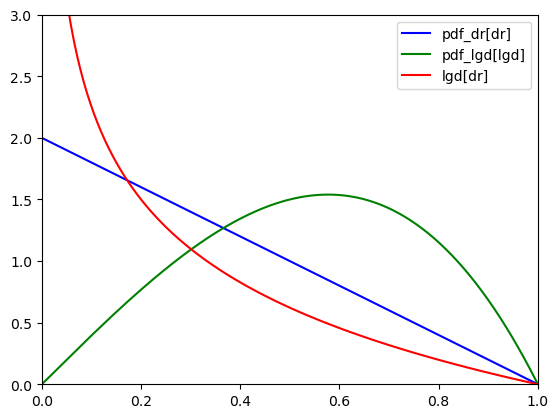

In [9]:
plt.plot(dr, pdf_dr,'b', label='pdf_dr[dr]')
plt.plot(lgd, pdf_lgd, 'g', label='pdf_lgd[lgd]')
plt.plot(loss, pdf_loss, 'r', label='lgd[dr]')
plt.legend()
plt.ylim((0,3))
plt.xlim((0,1))
plt.show()

In [10]:
EL = integrate.quad(lambda x: x * ((4/3) * np.power(x,(-1/3)) - (4/3) * np.power(x,(1/3))), 0, 1)[0]
print("The Expected Loss is %.2g"%EL)

The Expected Loss is 0.23


In [11]:
PD = integrate.quad(lambda x: x*(2-2*x), 0, 1)[0]
ELGD = EL/PD
print("The Expected LGD is %.2g"%ELGD)

The Expected LGD is 0.69


In [13]:
EcLGD = integrate.quad(lambda x: (2-2*x)*x**(0.5),0, 1)[0]
print("The Time-weighted LGD is %.2g" %EcLGD)

The Time-weighted LGD is 0.53


# Question 3

## Express the standard deviation of a Vasicek distribution as an integral that involves the Vasicek PDF. For distributions with PD = 0.10, numerically integrate and plot the standard deviation for 0.05 < rho < 0.95. On a separate diagram, plot two Vasicek distributions: PD = 0.10, rho = 0.05 and PD = 0.10, rho = 0.95, limiting the vertical axis to {0, 0.12}.  

$ Std(x) = \sqrt{ \int x^{2}*VasicekPDF[x]\,dx - (\int x*VasicekPDF[x]\,dx )^{2}}$

In [20]:
def std(PD, rho):
    def PDF(x):
        pdf = np.sqrt((1-rho)/rho)*1/norm.pdf(norm.ppf(x))*norm.pdf((np.sqrt(1-rho)*norm.ppf(x)-norm.ppf(PD))/np.sqrt(rho))
        return pdf
    b1 = integrate.quad(lambda x: x*x*PDF(x), 0, 1)[0]
    b2 = integrate.quad(lambda x: x*PDF(x), 0, 1)[0]
    std = np.sqrt(b1-(b2**2))
    return std  

In [21]:
rho = np.linspace(0.05, 0.95, num=50)
PD = 0.10
std_lst = []
for i in rho:
    std_lst.append(std(PD, i))

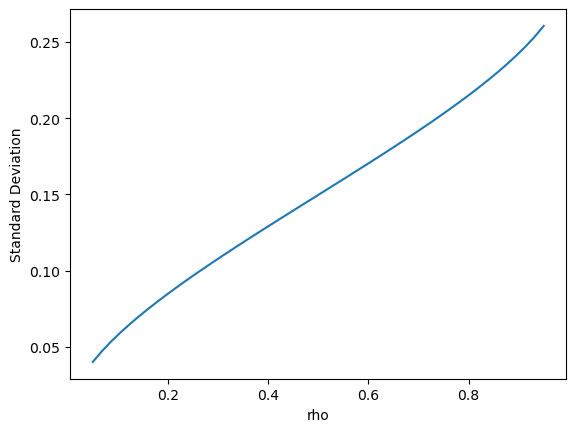

In [22]:
plt.plot(rho, std_lst)
plt.ylabel("Standard Deviation")
plt.xlabel("rho")
plt.show()

In [25]:
def PDF(x,PD,rho):
    pdf = np.sqrt((1-rho)/rho)*1/norm.pdf(norm.ppf(x))*norm.pdf((np.sqrt(1-rho)*norm.ppf(x)-norm.ppf(PD))/np.sqrt(rho))
    return pdf

In [26]:
x = np.arange(0, 1, 0.001)
pdf_1 = PDF(x, PD=0.1,rho=0.05)
pdf_2 = PDF(x, PD=0.1, rho=0.95)

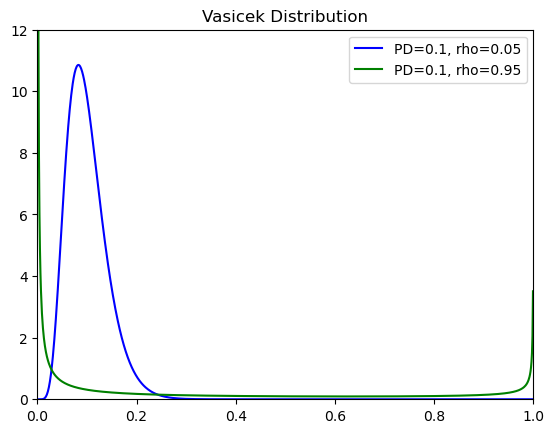

In [28]:
plt.plot(x, pdf_1,'b', label='PD=0.1, rho=0.05')
plt.plot(x, pdf_2, 'g', label='PD=0.1, rho=0.95')
plt.legend()
plt.ylim((0,12))
plt.xlim((0,1))
plt.title("Vasicek Distribution")
plt.show()

# Question 4

## Suppose two loans have Vasicek distributions. One loan has PD = 0.06, rho = 0.06, the second loan has PD = 0.03, rho = 0.20, and both loans respond to the same systematic risk factor. Plot on a single diagram the two inverse CDFs. At the lower quantiles, the first loan has greater cPD than the second. The situation is reversed at very high quantiles. Estimate the quantile at which both loans have the same value of cPD.  

In [29]:
def Inv_CDF(q, PD, rho):
    inv_cdf = norm.pdf((norm.ppf(PD)+np.sqrt(rho)*norm.ppf(q))/np.sqrt(1-rho))
    return inv_cdf

In [30]:
q = np.arange(0, 1, 0.001)
inv_cdf1 = Inv_CDF(q, PD=0.06, rho=0.06)
inv_cdf2 = Inv_CDF(q, PD=0.03, rho=0.2)

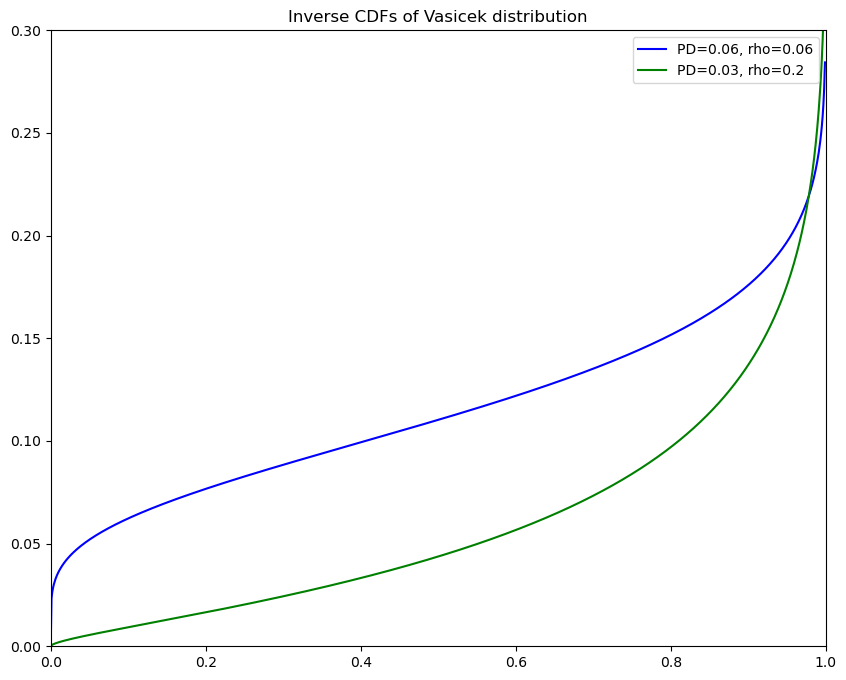

In [31]:
plt.figure(figsize=(10,8))
plt.plot(q, inv_cdf1,'b', label='PD=0.06, rho=0.06')
plt.plot(q, inv_cdf2, 'g', label='PD=0.03, rho=0.2')
plt.legend()
plt.title("Inverse CDFs of Vasicek distribution")
plt.ylim((0,0.3))
plt.xlim((0,1))
plt.show()

In [32]:
def calc_q(q):
    f1 = Inv_CDF(q, 0.06,0.06)
    f2 = Inv_CDF(q, 0.03, 0.2)
    return f2-f1
q_opt = optimize.bisect(calc_q, 0.8, 0.999)
print("When q is %.2g, both loans have the same value of cPD." % q_opt)

When q is 0.98, both loans have the same value of cPD.
